In [ ]:
# First, Click on the run button (triangle) on the left only once
!git clone "https://github.com/Pi-31415/BrendanIA"  
%cd BrendanIA
%ls
%mkdir data
%pip install -r requirements.txt  # install dependencies

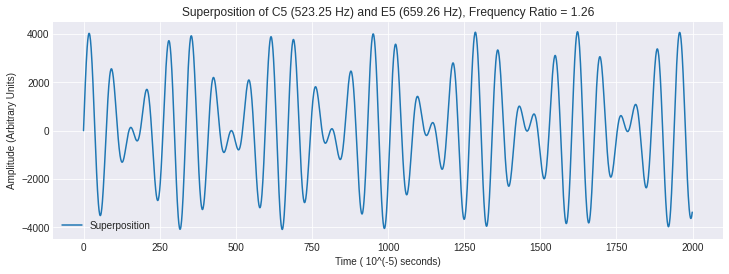

In [ ]:
# After running the top block, click on the run button (triangle) on the whenever you want to try out a new note combination
# Scroll down to see the results, you can download them
"""
Consonance and dissonance in music.
@author: Brendan
"""
import numpy as np
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
import pianoutil as utils
from IPython.display import Audio
from IPython.utils import io

Amplitude = 2048
# Lower the following graph width if the graph looks too messy
graph_width = 2000
# To change your notes, change the following values of note1 and note 2
# For ordinary note, type a capital letter followed by number (e.g. C5 for middle C)
# For accidentals, type a # in between (e.g. A#5)
# Note that there is no E# and B#.
note1 = 'C5'
note2 = 'E5'

note_freqs = utils.get_piano_notes()

##############################################################################
# Graphing and Audio Generation begins here
##############################################################################
note1_original = note1
note2_original = note2

if(note1.__contains__('#')):
  note1 = note1.lower()
  note1 = note1.replace("#","")

if(note2.__contains__('#')):
  note2 = note2.lower()
  note2 = note2.replace("#","")

track1 = utils.get_sine_wave(note_freqs[note1], 2, amplitude=Amplitude)  
track2 = utils.get_sine_wave(note_freqs[note2], 2, amplitude=Amplitude) 
wavfile.write('data/'+note1+'_'+note2+'.wav', rate=44100, data=((track1+track2)/2).astype(np.int16))

display(Audio('data/'+note1+'_'+note2+'.wav', rate=44100))

raw_freq1 = int(round(note_freqs[note1], 0))
raw_freq2 = int(round(note_freqs[note2], 0))

frequency_ratio = round(raw_freq2/raw_freq1,2)

plt.figure(figsize=(12,4))
#plt.plot(track1[:graph_width], label=note1_original+" ("+str(round(note_freqs[note1],2))+ " Hz)")
#plt.plot(track2[:graph_width], label=note2_original+" ("+str(round(note_freqs[note2],2))+ " Hz)")
plt.plot((track1+track2)[:graph_width], label='Superposition')
plt.xlabel('Time ( 10^(-5) seconds)')
plt.ylabel('Amplitude (Arbitrary Units)')
plt.title('Superposition of '+note1_original+" ("+str(round(note_freqs[note1],2))+ " Hz)"+' and '+note2_original +" ("+str(round(note_freqs[note2],2))+ " Hz), Frequency Ratio = "+str(frequency_ratio))
plt.grid()
plt.legend()
plt.savefig('data/'+note1+'_'+note2+'.jpg')

# The audio file and the graph should be generated below, you can download the audio file and save the graph

